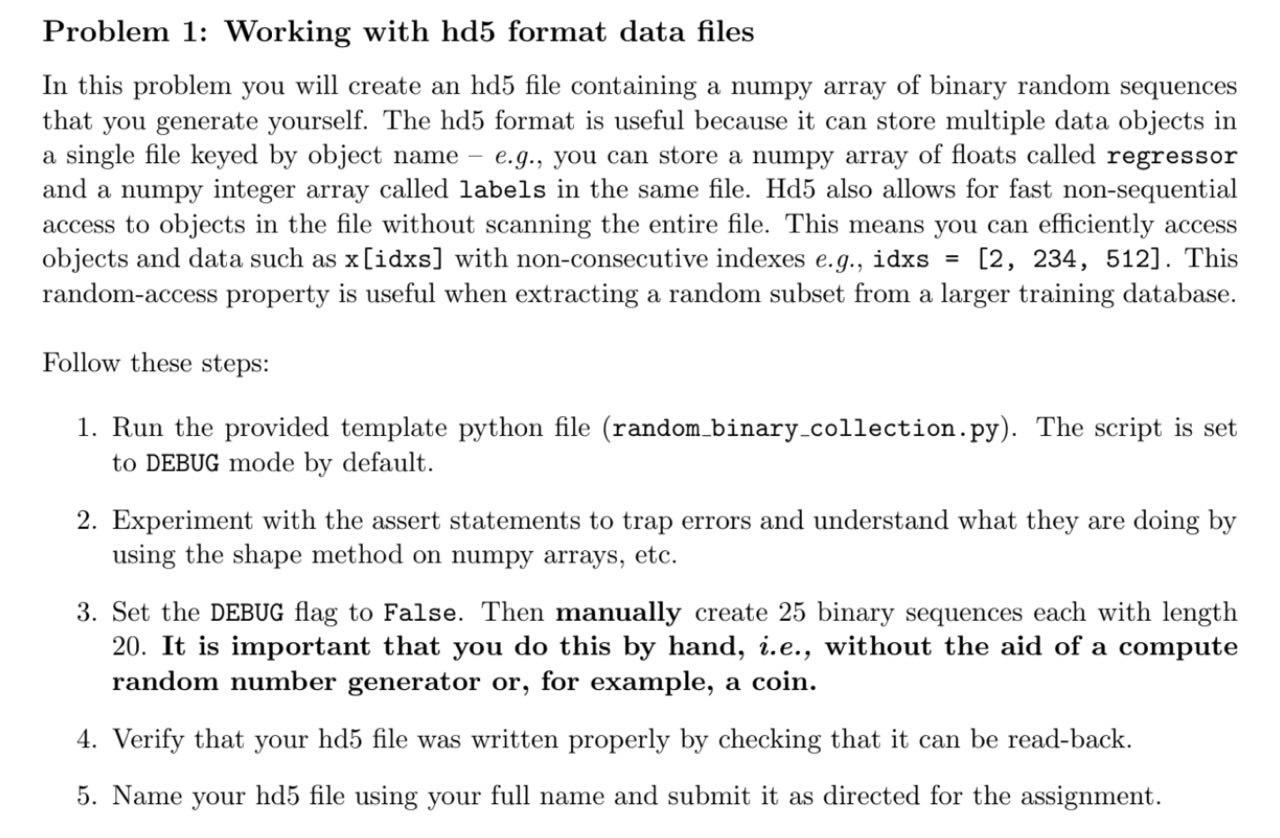

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy

DEBUG = False
DATA_FNAME = 'adityan_jothi_hw1_1.hd5'

if DEBUG:
    num_sequences = 3
    sequence_length = 4
else:
    num_sequences = 25
    sequence_length = 20

### Enter your data here...
### Be sure to generate the data by hand.  DO NOT:
###     copy-n-paste
###     use a random number generator
###
if DEBUG:
    x_list = [
        [ 0, 1, 1, 0],
        [ 1, 1, 0, 0],
        [ 0, 0, 0, 1]
    ]
else:
    x_list=[
        [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0], #alternates
        [1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0], #2 0s between 1s
        [1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0], #3 0s between 1s
        [1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0], #4 0s between 1s
        [1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0], #5 0s between 1s
        [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1], #rev alternates
        [0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1], # 2 1s between 0s
        [0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1], # 3 1s betweem 0s
        [0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1], # 4 1s between 0s
        [0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1], # 5 1s between 0s
        [0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1], # 00s 11s
        [0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0], # 000s 111s
        [0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0], # 0000s 1111s
        [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1], # 00000s 11111s
        [1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0], # 11s 00s
        [1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1], # 111s 000s
        [1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1], # 1111s 0000s
        [1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0], # 11111s 00000s
        [1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,0], # 1010 1101
        [1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,0,1,1,0,1], # 1101 1010
        [1,0,1,0,1,0,1,1,1,0,1,0,1,0,1,1,1,0,1,0], # 1010 1011
        [1,0,1,1,1,0,1,0,1,0,1,1,1,0,1,0,1,0,1,1], # 1011 1010
        [0,0,1,1,1,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1], # 0011 1010
        [1,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,0,1,0], # 1010 0011
        [1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1] # 1101 0000
     ]
# convert list to a numpy array...
human_binary = np.asarray(x_list,dtype=np.int)


### do some error trapping:

assert human_binary.shape[0] == num_sequences, 'Error: the number of sequences was entered incorrectly'
assert human_binary.shape[1] == sequence_length, 'Error: the length of the seqeunces is incorrect'

# the with statement opens the file, does the business, and close it up for us...
with h5py.File(DATA_FNAME, 'w') as hf:
    hf.create_dataset('human_binary', data = human_binary)
    #hf.create_dataset('dummy',data=np.array([1,2,3,4,5]))
    ## note you can write several data arrays into one hd5 file, just give each a different name.

###################
# Let's read it back from the file and then check to make sure it is as we wrote...
with h5py.File(DATA_FNAME, 'r') as hf:
    hb_copy = hf['human_binary'][:]
    #dummy_copy = hf['dummy'][:]
    #print(dummy_copy)
assert all([all([ el in [0,1] and np.issubdtype(el, int) for el in seq ]) for seq in hb_copy])
### this will throw and error if they are not the same...
np.testing.assert_array_equal(human_binary, hb_copy)
#np.testing.assert_array_equal(np.array([1,2,3,4,5]),dummy_copy)
#np.testing.assert_array_equal(np.array([1,2,3,4,5,6]),dummy_copy)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.


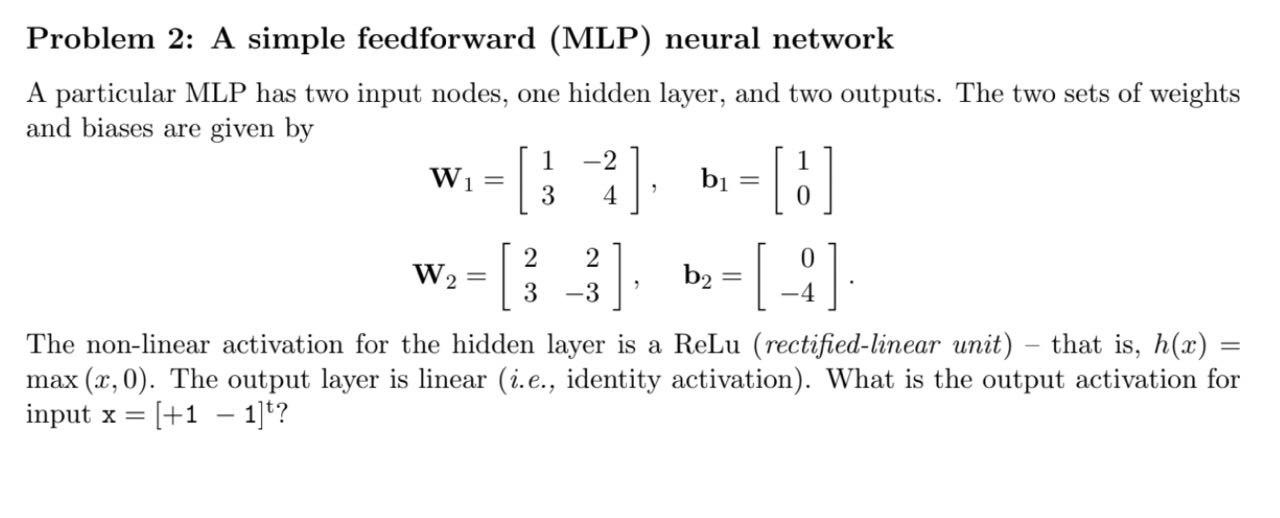

In [ ]:
import numpy as np

class MLP():
    def __init__(self):
        self.W1=np.array([
            [1,-2],
            [3,4]
        ])
        self.W2=np.array([
            [2,2],
            [3,-3]
        ])
        self.b1=np.array([1,0]).T
        self.b2=np.array([0,-4]).T

    def relu(self, arr):
        return np.clip(arr,a_min=0,a_max=None)
    def forward(self, x):
        a1=self.relu(np.matmul(self.W1,x.T)+self.b1)
        a2=np.matmul(self.W2,a1.T)+self.b2
        return a2

# if __name__=='__main__':
x=np.array([1,-1]).T
net=MLP()
out=net.forward(x)
print('Output Activation:',out)

Output Activation: [8 8]


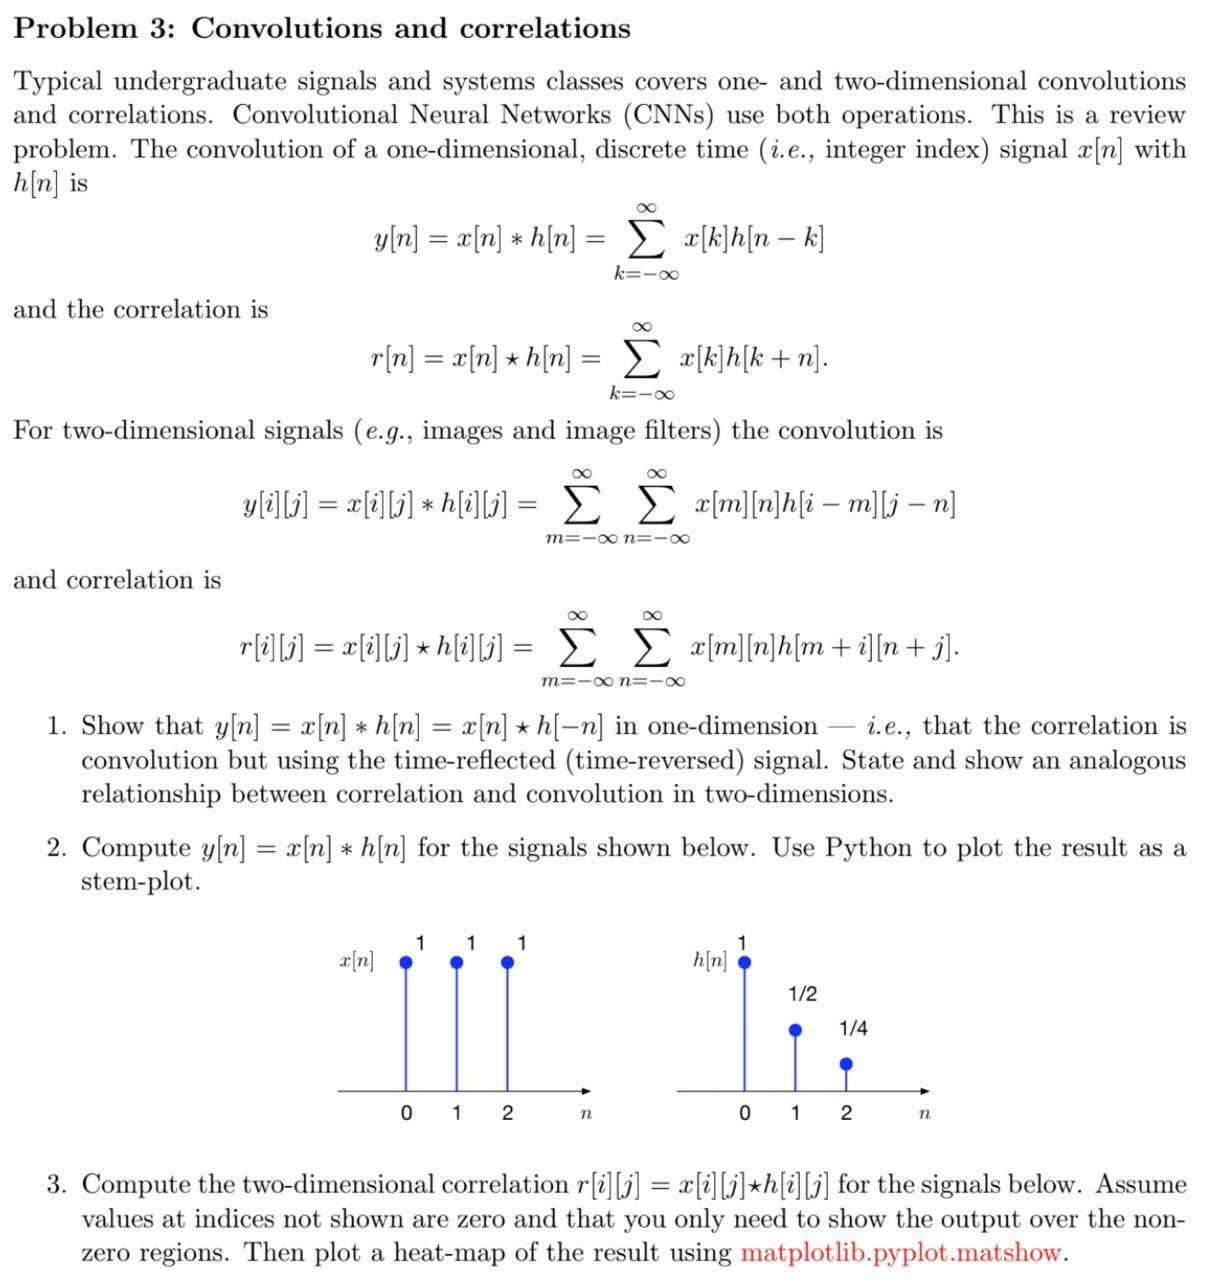

[1.0, 1.5, 1.75, 0.75, 0.25]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


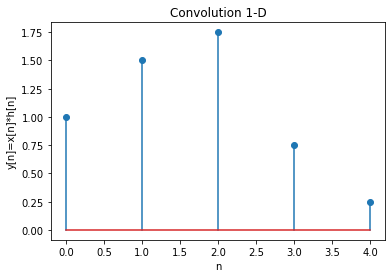

[1.0, 1.5, 1.75, 0.75, 0.25]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

def subproblem_2(x,h):
    y=np.convolve(x,h)
    # y_prime=np.correlate(x,h,'full')
    # x=np.pad(x,pad_width=1)
    y=[0,0,0,0,0]
    for i in range(len(x)+len(h)-1):
        for j in range(len(h)):
            # print(i)
            # print('=====')
            if i-j<0: continue
            if i-j>=len(x):continue
            # print(x[i-j], h[j])
            y[i]+=x[i-j]*h[j]
    print(y)
    fig=plt.figure()
    plt.stem(y, label='Convolution 1-D')
    plt.title('Convolution 1-D')
    plt.xlabel('n')
    plt.ylabel('y[n]=x[n]*h[n]')
    plt.show()
    return y

x=np.array([1,1,1],dtype=float)
h=np.array([1,1/2,1/4],dtype=float)
subproblem_2(x,h)

[[0.25 0.75 1.   1.   1.   0.75 0.25]
 [0.75 2.25 3.   3.   3.   2.25 0.75]
 [1.   3.   4.   4.   4.   3.   1.  ]
 [0.75 2.25 3.   3.   3.   2.25 0.75]
 [0.25 0.75 1.   1.   1.   0.75 0.25]]


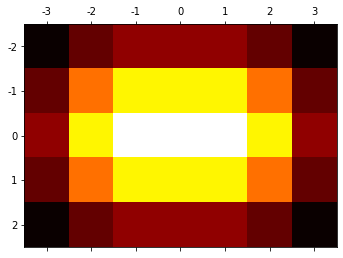

In [ ]:
def subproblem_3(x,h):
    y=signal.correlate(x,h)
    rows=[]
    for row in y:
        if (np.zeros(row.shape[0])==row).all():
            continue
        rows.append(row)
    y_row_crop=np.row_stack(rows)
    cols=[]
    for col in y_row_crop.T:
        if (np.zeros(col.shape[0])==col).all():
            continue
        cols.append(col)
    y_cropped=np.column_stack(cols)
    
    print(y_cropped)
    plt.matshow(y_cropped, cmap='hot')
    plt.gca().set_xticklabels(np.arange(-4,4))
    plt.gca().set_yticklabels(np.arange(-3,3))
    plt.show()

x=np.array(
    [
        [0,0,0,0,0,0,0],
        [0,1,1,1,1,1,0],
        [0,1,1,1,1,1,0],
        [0,1,1,1,1,1,0],
        [0,0,0,0,0,0,0]
    ]
)

h=np.array(
    [
        [0,0,0,0,0],
        [0,1/4,1/2,1/4,0],
        [0,1/2,1,1/2,0],
        [0,1/4,1/2,1/4,0],
        [0,0,0,0,0]
    ]
)
subproblem_3(x,h)

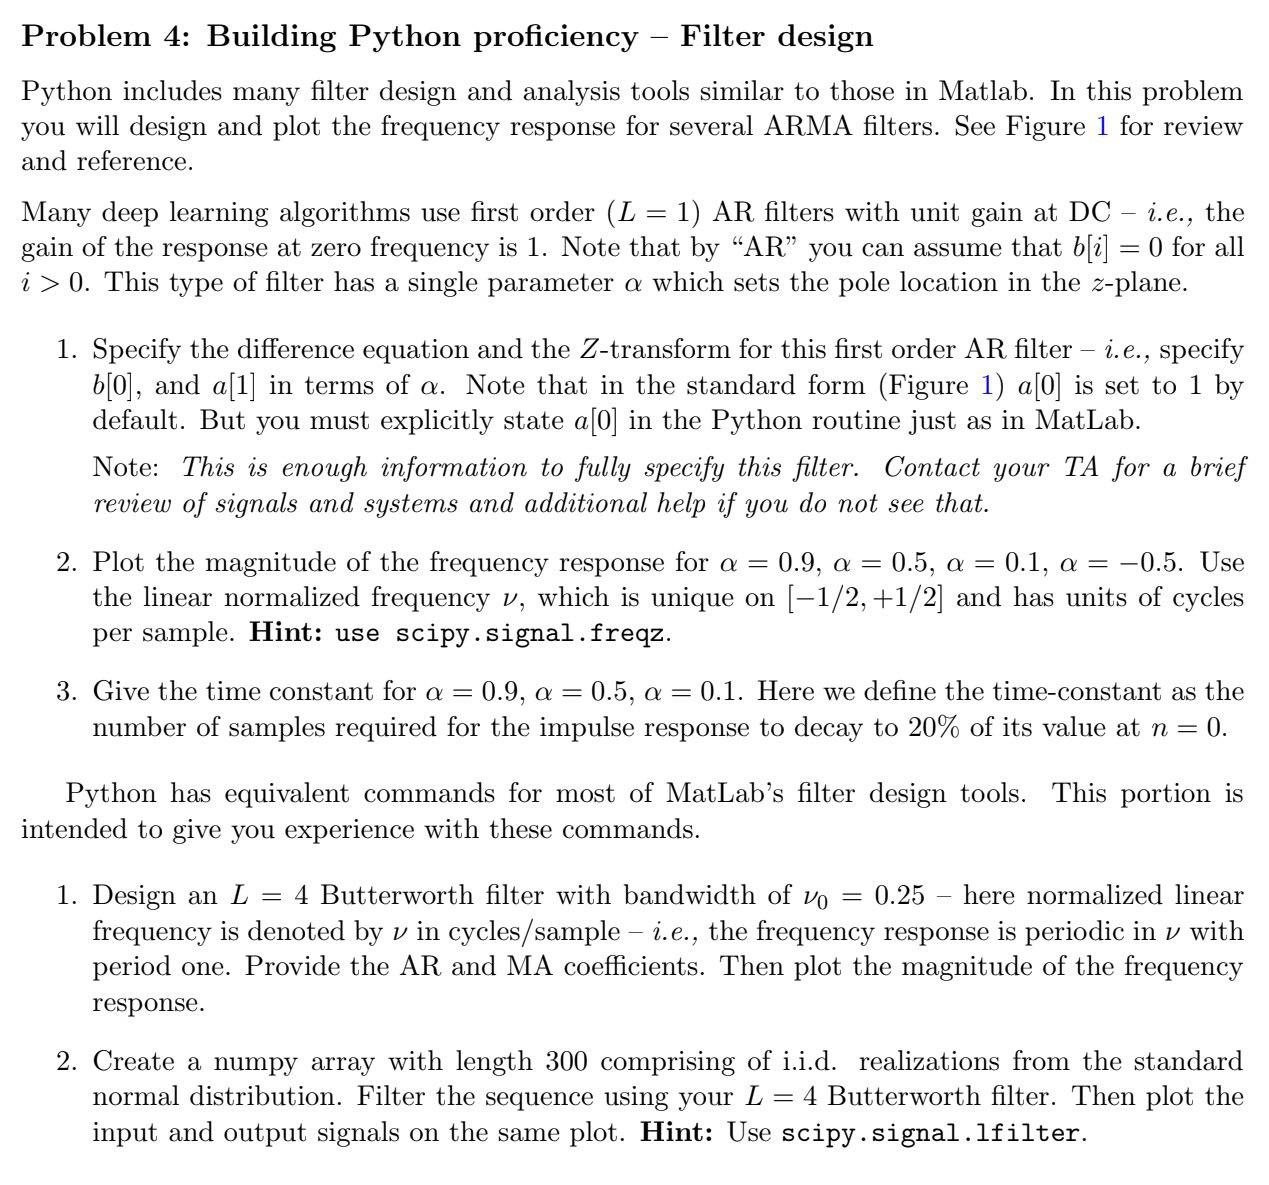

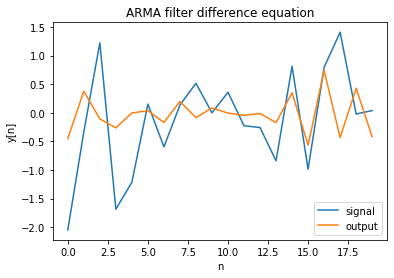

In [ ]:
def subproblem_1():
    x=np.random.randn(20)
    y=np.zeros(20)
    L=1
    alpha=0.78
    a=[1,-alpha]
    b=[1-alpha]
    for n in range(x.shape[0]):
        sum_1=0
        sum_2=0
        for i in range(L):
            sum_1+=b[i]*x[n-i]
            sum_2+=a[i]*y[n-1]
        y[n]=sum_1-sum_2
    plt.plot(x,label='signal')
    plt.plot(y,label='output')
    plt.xlabel('n')
    plt.ylabel('y[n]')
    plt.legend()
    plt.title('ARMA filter difference equation')
    plt.show()
subproblem_1()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


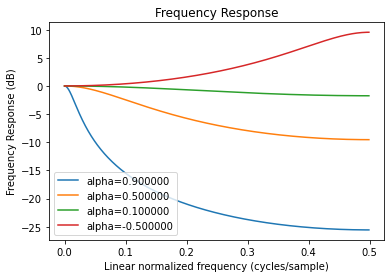

In [ ]:
def subproblem_2(alphas=[0.9,0.5,0.1,-0.5]):
    for alpha in alphas:
        b=1-alpha
        a=[1, -alpha]
        w,h = signal.freqz(b,a)
        v = w/(2*np.pi)
        plt.xlabel('Linear normalized frequency (cycles/sample)')
        plt.ylabel('Frequency Response (dB)')
        plt.title('Frequency Response')
        plt.plot(v,20*np.log10(h),label='alpha=%f'%alpha)
    plt.legend()
    plt.show()
subproblem_2()

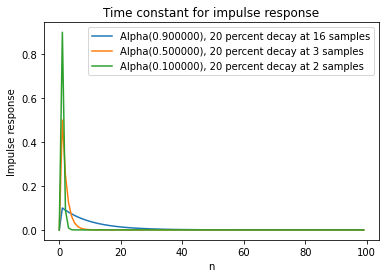

In [ ]:
def subproblem_3(alphas=[0.9,0.5,0.1]):
    def find_closest_to_n(arr, n):
        return min(range(len(arr)), key=lambda x: abs(arr[x]-n))
    for alpha in alphas:
        b=[1-alpha]
        a=[1.0,-alpha]
        imp = signal.unit_impulse(100)
        # response = signal.lfilter(b,a,imp)
        t,y = signal.dimpulse((b,a,1))
        # print(y)
        idx=find_closest_to_n(y[0],y[0][1]*0.2)
        plt.plot(np.arange(0,100),y[0], label='Alpha(%f), 20 percent decay at %d samples'%(alpha,idx))
        plt.legend()
        plt.xlabel('n')
        plt.ylabel('Impulse response')
        plt.title('Time constant for impulse response')
        # plt.show()
    plt.show()
subproblem_3()

AR coefficients: [ 1.         -1.96842779  1.73586071 -0.72447083  0.1203896 ]
MA coefficients: [0.01020948 0.04083792 0.06125688 0.04083792 0.01020948]


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


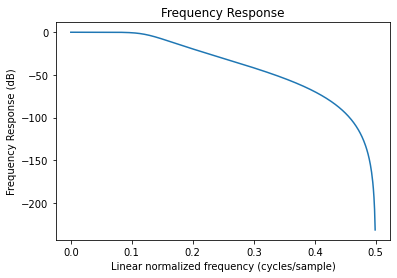

In [ ]:
def subproblem_4(l=4, bandwidth=0.25):
    b, a = signal.butter(l,bandwidth)
    print('AR coefficients:',a)
    print('MA coefficients:',b)
    w,h = signal.freqz(b,a)
    v=w/(2*np.pi)
    plt.plot(v,20*np.log10(h))
    plt.xlabel('Linear normalized frequency (cycles/sample)')
    plt.ylabel('Frequency Response (dB)')
    plt.title('Frequency Response')
    plt.show()
subproblem_4()

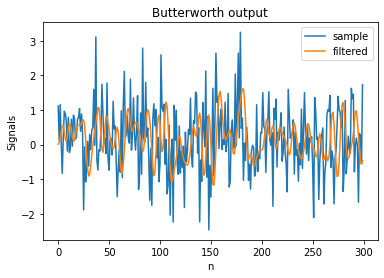

In [ ]:
def subproblem_5(len=300):
    b,a=signal.butter(4,0.25)
    # samples=[np.random.normal(size=1) for i in range(300)]
    samples=np.random.normal(size=len)
    y=signal.lfilter(b,a,samples)
    plt.plot(samples,label='sample')
    plt.plot(y, label='filtered')
    plt.xlabel('n')
    plt.ylabel('Signals')
    plt.title('Butterworth output')
    plt.legend()
    plt.show()
subproblem_5()